# Проект по анализу данных

## Общая информация

Дата выдачи: 22.03.2016

Срок сдачи: 10.04.2016 09:00MSK

### О задании
В рамках курса "Интеллектуальный анализ данных" помимо выполнения контрольных и практических заданий вам также нужно выполнить проект. За каждый модуль ставится отдельная оценка. В этом модуле вам предстоит познакомиться с данными, сделать их описание, поискать закономерности. В следующем модуле вы продолжите работу с этими данными, но уже будете строить непосредственные модели, работающие с ними. 

Там, где требуется написать код, будет указано:
    
    ######################
    ### YOUR CODE HERE ###
    ######################

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Помимо кода вам также требуется написать развернутые ответы на вопросы.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить задание на указанных в ответном письме условиях.

Задание выполняется САМОСТОЯТЕЛЬНО. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Если вы будете решать задание на виртуальной машине, учтите, что его могут видеть все. К тому же недоступность виртуальной машины не является уважительной причиной для продления дедлайна.

Обратите внимание, что на устном зачете в конце семестра некотоые вопросы могут быть связаны с проектом.

### Доп. баллы
В данном проекте вам будет предложено рассмотреть некоторые интересные закономерности в данных. Если вы обнаружите что-то интересное (например, в последнем пункте), либо у вас есть идеи как можно работать с данным датасетом — присылайте, это будет поощряться дополнительными баллами. Кроме того, вы можете выступить со своим личным исследованием на семинаре, это также не останется незамеченным.

### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: Username_(group)_Project.ipynb, где Username — ваша фамилия на латинице, group — название группы (например, Petrov_IAD-19_Project.ipynb). Далее отправьте этот файл на используемую в Вашей группе почту курса (hse.minor.dm@gmail.com) c темой письма [ИАД-19] - Проект - Фамилия Имя Отчество.

## Определение итоговой оценки студента

В качестве данных мы будем рассматривать два датасета, а именно предсказание оценки по португальскому языку или математике. С какими именно данными нужно будет работать вам можно узнать, посмотрев [распределение по вариантам](https://docs.google.com/spreadsheets/d/1UUlgsu5TD-_YUNVtGkhrFr1zaQSHiQ8JfZ7VfbzYKAg/edit?usp=sharing).

По набору и типу признаков эти данных никак не отличаются, поэтому на все вопросы ниже вам нужно ответить в рамках вашего датасета.

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import pylab as plt
%matplotlib inline

Для начала загрузите данные. Обратите внимание, чтобы данные были загружены верно (был указан верный разделитель, а так же корректно отображались названия столбцов). Чтобы это проверить, а также посмотреть что представляют из себя данные, можно вывести первые несколько строк загруженного датасета на экран.

In [3]:
######################
### YOUR CODE HERE ###
######################
data = pd.read_csv('student-por.csv', sep=';')
## why there are no commands like pd.read_tsv('student-por.csv') or pd.read_scsv('student-por.csv'), i wonder
print(data[:3])

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob     Fjob ...  \
0     GP   F   18       U     GT3       A     4     4  at_home  teacher ...   
1     GP   F   17       U     GT3       T     1     1  at_home    other ...   
2     GP   F   15       U     LE3       T     1     1  at_home    other ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  

[3 rows x 33 columns]


**(0.5 балла)** Что в данной задаче является объектом?

Объектом является школьник (он обладает несколькими признаками, и мы пытаемся спрогнозировать его итоговую оценку за португальский исходя из них).

Как можно видеть, признаков много и они все разной природы. Вот более подробная расшифровка признаков:

 - school - тип школы ("GP" - Gabriel Pereira или "MS" - Mousinho da Silveira)
 - sex - пол ("F" - female или "M" - male)
 - age - возраст (от 15 до 22)
 - address - откуда студент ("U" - urban или "R" - rural)
 - famsize - размер семьи ("LE3" - меньше или равно 3 или "GT3" - больше 3)
 - Pstatus - в каких отношениях родители ("T" - живут вместе "A" - раздельно)
 - Medu - образование матери (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Fedu - образование отца (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Mjob - работа матери ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - Fjob - работа отца ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - reason - причина выбора школы (близко к дому — "home", репутация школы — "reputation", "course" предпочтение некоторым предметам или "other")
 - guardian - опекун ("mother", "father" или "other")
 - traveltime - время от дома до школы (1 - меньше 15 мин., 2 - 15 до 30 мин., 3 - 30 мин. до 1 часа, или 4 - больше 1 часа)
 - studytime - количество часов обучения в неделю (1 - меньше 2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов, или 4 - больше 10 часов)
 - failures - количество ранее не сданных предметов (n if 1 <= n < 3, else 4)
 - schoolsup - дополнительные занятия (yes or no)
 - famsup - помощь от семьи при выполнении заданий (yes or no)
 - paid - дополнительные платные занятия (yes or no)
 - activities - внеклассная деятельность (yes or no)
 - nursery - посещал детский сад (yes or no)
 - higher - желание высшего образования (yes or no)
 - internet - домашний интернет (yes or no)
 - romantic - состоит в романтических отношениях (yes or no)
 - famrel - насколько хорошо отношения в семье (от 1 - очень плохие до 5 - превосходные)
 - freetime - наличие свободного времени после школы (от 1 - очень мало до 5 - очень много)
 - goout - гуляет с друзьями (от 1 - редко до 5 - очень часто)
 - Dalc - употребление алкоголя в будние дни (от 1 - очень редко до 5 - очень часто)
 - Walc - употребление алкоголя в выходные (от 1 - очень редко до 5 - очень часто)
 - health - текущее состояние здоровья (от 1 - очень плохое до 5 - очень хорошее)
 - absences - количество школьных пропусков (от 0 до 93)

Признаки ниже связаны с курсом (математика/португальский)
 - G1 - оценка за первый семестр (от 0 до 20)
 - G2 - оценка за второй семестр (от 0 до 20)
 - [целевая переменная] G3 - итоговая оценка (от 0 до 20)

**(0.5 балла)** Какое количество признаков есть в данной задаче (целевая переменная не является признаком)?

In [4]:
######################
### YOUR CODE HERE ###
######################
print(int(data.columns.size)-1)

32


Вычитаем 1, так как одна колонка данных соответствует G3, а она является не признаком, а целевой переменной.

**(1 балл)** Определите к какому из указанных ниже типов относится каждый признак:
 - бинарный
 - числовой
 - категориальный
 - порядковый
 - множественный

Если признаков некоторого типа нет, укажите это.

Бинарные: school, sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic

Числовые: age, absences, G1, G2

Порядковые: Medu (почему-то вначале про образование в лекциях говорилось, что категориальный), но я считаю, это скорее порядковый признак), Fedu, traveltime, studytime, failures (он явно неправильно определен, т.к. бывает и 0, а 4 вообще не бывает), famrel, freetime, goout, Dalc, Walc, health

Категориальные: Mjob, Fjob, reason, guardian

Множественных признаков нет.

In [5]:
# проверяем, какие бывают значения у data.failures:
print(data[data.failures == 0])
print(data[data.failures == 1])
print(data[data.failures == 2])
print(data[data.failures == 3])
print(data[data.failures == 4])

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
5       GP   M   16       U     LE3       T     4     3  services     other   
6       GP   M   16       U     LE3       T     2     2     other     other   
7       GP   F   17       U     GT3       A     4     4     other   teacher   
8       GP   M   15       U     LE3       A     3     2  services     other   
9       GP   M   15       U     GT3       T     3     4     other     other   
10      GP   F   15       U     GT3       T     4     4   teacher    health   
11      GP   F   15       U     GT3       T     2   

**(0.5 балла)** Есть ли в данных пропуски? Если да, назовите какие признаки имеют пропуски и удалите все объекты с пропусками. 

In [6]:
no_space = data.dropna(axis='index')
print(data.index.size - no_space.index.size) # кол-во учеников с пропусками в данных

0


Как мы видим, команда ничего не выбросила, т.е. пропусков в данных нет вообще.

**(1 балл)** Теперь посмотрите на целевую переменную. К какому типу задач относится данная? Поясните свой ответ.

Целевая переменная G3 принимает целые значения от 0 до 20, и мы пытаемся предсказать ее (в пределах некоторой погрешности), в зависимости от значений признаков, различных для каждого школьника, поэтому это задача линейной регрессии.

**(1 балл)** Постройте гистограмму значений целевой переменной с количеством бинов (bins) равным 20. Какое самое частое значение? Есть ли студенты, получившие 0? 20? Постройте аналогичные гистограммы для признаков G1 и G2. Есть ли различие между ними и целевой переменной и в чем оно состоит?

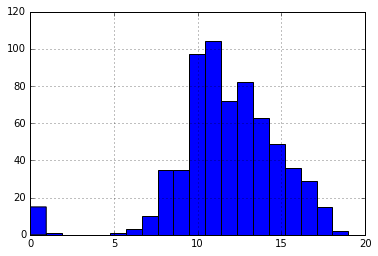

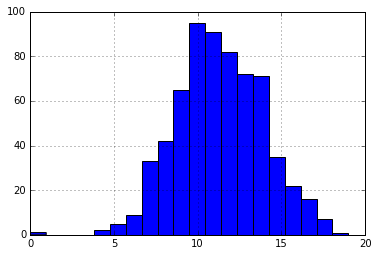

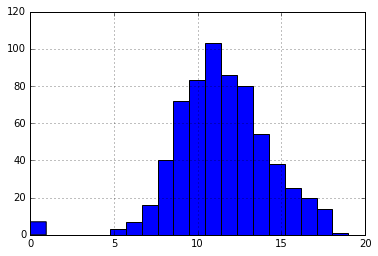

In [7]:
######################
### YOUR CODE HERE ###
######################
plt.figure();
data['G3'].hist(bins=20);
# Чаще всего встречается значение 11. Есть много студентов, которые получили 0, 20 ни у кого нет. 
plt.figure();
data['G1'].hist(bins=20);
plt.figure();
data['G2'].hist(bins=20);
# G1 от G2 почти не отличается (у G2 гораздо больше 0, видимо, во втором семестре оценки выставляли строже)
# У целевой переменной G3 еще больше 0, чем у G2, и по неизвестной причине наблюдается провал при итоговой оценке 12.
# Каких-то серьезных отличий между G3 и G1,G2 (например, если бы у нескольких студентов было 20), не наблюдается.

**(1 балл)** Посчитайте корреляцию Пирсона между целевой переменной и значениями G1 и G2. Можно ли сказать, что между ними есть линейная зависимость? Для вычисления корреляции Пирсона можно воспользоваться функцией [pearsonr](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) из модуля scipy.stats или методом [corr](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) датафрейма.

In [8]:
######################
### YOUR CODE HERE ###
######################
pair=data[['G1','G2']]
print(pair.corr(method='pearson'))

          G1        G2
G1  1.000000  0.864982
G2  0.864982  1.000000


Видно, что коэффициент (0,86) по модулю близок к единице (-1 и 1 означают линейную зависимость, в случае -1 - зависимость обратная, в случае с +1 - зависимость прямая), однако, так как он ей не равен, именно линейной зависимости между G1 и G2 нет.

**(0.5 балла)** Найдите самую частую причину выбора школы.

In [9]:
######################
### YOUR CODE HERE ###
######################
r = data.groupby('reason', sort = False).reason
print(r.value_counts().idxmax()[0])

course


Поэтому самая частая причина выбора школы - наличие в ней определенных курсов.

**(1 балл)** В данных есть несколько интересных признаков. Например, школа. Постройте на одной гистограмме распределение целевой переменной в зависимости от школы. Верно или нет, что у студенты одной школы имеют оценки выше, чем другой? Кроме того, интересно также узнать, сказывается ли причина выборка школы на оценках. Постройте аналогичную гистограмму для тех, у кого в поле причины указана самая частая причина (она должна быть найдена в предыдущем пункте) и всех остальных. Верно ли, что студенты, выбравшие данную школу по этой причине более успешны?

(Примеры как можно строить такие гистограммы можно посмотреть в материалах к семинарам или [здесь](http://matplotlib.org/examples/statistics/histogram_demo_multihist.html) и [здесь](http://stackoverflow.com/questions/6871201/plot-two-histograms-at-the-same-time-with-matplotlib)). 

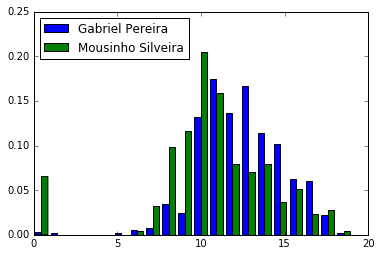

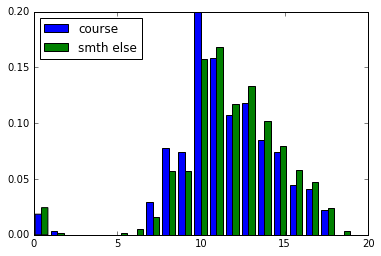

In [10]:
######################
### YOUR CODE HERE ###
######################
main_reason = data.groupby('reason', sort = False).reason.value_counts().idxmax()[0]

plt.figure()
plt.hist([data[data.school == 'GP']['G3'], data[data.school == 'MS']['G3']], bins=20, normed=1, histtype='bar', 
         label = ['Gabriel Pereira', 'Mousinho Silveira'])
plt.legend(loc = 'upper left')
plt.figure()
plt.hist([data[data.reason == main_reason]['G3'], data[data.school != main_reason]['G3']], bins=20, normed=1, histtype='bar', 
         label = ['course', 'smth else'])
plt.legend(loc = 'upper left')

Даже на первый взгляд из гистограмм все видно: студенты Gabriel Pereira учатся лучше, чем студенты Mousinho da Silveira; те, кто поступил в школу из-за наличия определенных предметов (по причине 'course'), учатся в среднем хуже, чем остальные (у них больше низких оценок и меньше высоких). Так что, видимо, они менее успешны (в учебе (по португальскому языку)).

**(0.5 балла)** Сделайте описание числовых признаков: какое среднее, медиана, дисперсия, минимальное и максимальное значение. Для всех ли признаков эти величины имеют смысл? Если нашлись такие признаки, то поясните почему.

In [11]:
######################
### YOUR CODE HERE ###
######################
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


Понятно, что для порядковых признаков describe передает меньше новой информации, однако мы все равно можем узнать из этого что-то новое (правда, иногда только медианы - квантиля 50% бывает не совсем достаточно, как в случае с failures), среднее же для подавляющего большинства порядковых признаков вообще ничего не показывает, можно только понять какую-то совсем общую картину. Для числовых же все лучше - теперь мы знаем среднюю оценку за семестр и средний возраст учащихся (и видно, что на самом деле большинство студентов -- несовершеннолетние).

**(0.75 балла)** Верно ли, что студенты имеющие больше 10 пропусков учатся хуже, чем все остальные? На этот вопрос вы можете ответить, посмотрев на данные любым удобным для вас способом (например, аналогично предыдущим пунктам, либо сравнив средние оценки и т.д.). 

In [12]:
######################
### YOUR CODE HERE ###
######################
truants_mark = data[data.absences > 10].G3
nerds_mark = data[data.absences <= 10].G3
print(truants_mark.mean(), nerds_mark.mean())

10.653061224489797 12.008333333333333


Ну, хоть прогульщики и получили в среднем за португальский на полтора балла меньше в итоге, может, они тратили свое время на что-то более полезное лично для них?... Немного хуже учатся, совсем чуть-чуть.

**(0.75 балла)** Верно ли, что студенты желающие получить высшее образование учатся лучше, чем все остальные? 

In [13]:
######################
### YOUR CODE HERE ###
######################
no_goal = data[data.higher == 'no']
have_goal = data[data.higher == 'yes']
print(no_goal.G3.mean(), have_goal.G3.mean())

8.797101449275363 12.275862068965518


Видно, что те, кто хочет получить высшее образование, получили итоговые оценки по португальскому гораздо выше, чем все остальные студенты.

**(1 балл)** Выберете признаки из не рассмотренных ранее. Какие на ваш взгляд влияют на итоговую оценку? Попробуйте найти закономерности, аналогичные рассмотренным ("студенты желающие получить высшее образование учатся лучше, чем все остальные").

In [26]:
######################
### YOUR CODE HERE ###
######################
#traveltime 
girls = data[data.sex == 'F']
boys = data[data.sex == 'M']
print(girls.G3.mean(), boys.G3.mean())

p_together = data[data.Pstatus == 'T']
p_along = data[data.Pstatus == 'A']
print(p_together.G3.mean(), p_along.G3.mean())

close = data[data.traveltime == 1]
far = data[data.traveltime == 2]
really_far = data[data.traveltime == 3]
oh_what = data[data.traveltime == 4]
print(close.G3.mean(), far.G3.mean(), really_far.G3.mean(), oh_what.G3.mean())

yes = data[data.famsize == 'LE3']
no = data[data.famsize == 'GT3']
print(yes.G3.mean(), no.G3.mean())

one = data[data.Mjob == 'teacher']
two = data[data.Mjob == 'health']
three = data[data.Mjob == 'services']
four = data[data.Mjob == 'at_home']
five = data[data.Mjob == 'other']
print(one.G3.mean(), two.G3.mean(), three.G3.mean(), four.G3.mean(), five.G3.mean())

12.2532637075718 11.406015037593985
11.905096660808436 11.9125
12.251366120218579 11.577464788732394 11.166666666666666 10.875
12.130208333333334 11.811816192560174
13.13888888888889 13.0625 12.147058823529411 11.044444444444444 11.670542635658915


Девочки учатся немного лучше, чем мальчики (примерно балл итоговой оценки), отношения родителей практически не влияют на оценку.

И последнее: Чем ближе живет студент к школе, тем выше его средний балл. Влияет даже сильнее, чем первый рассмотренный признак - достигается разница, в среднем, в полтора балла итоговой оценки за португальский язык.

In [27]:
regressors = [Ridge(), Lasso(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor()]
#сразу составим массив из регрессоров, поскольку потом нам придется использовать сразу все по очереди

NameError: name 'Ridge' is not defined

In [ ]:
ridge_alpha = np.arange(10, 40, 0.5)
lasso_alpha = np.arange(0.01, 0.1, 0.004)
n_neighbours = np.arange(3, 33, 2)
min_samples_leaf = np.arange(10, 65, 3)
n_estimators = np.arange(10, 50, 2)

parameters = [ridge_alpha, lasso_alpha, n_neighbours, min_samples_leaf, n_estimators]

In [ ]:
# теперь найдем нужные гиперпараметры
for i in range(len(regressors)):
    regressor = regressors[i]
    parameter = parameters[i]
    grid_search = GridSearchCV(regressor, parameter, cv=5)
    grid_search.fit(data_start_features, data_start_target)
    print(grid_search.best_params_)
    # в исходном массиве с регрессорами заменим каждый элемент на соответствующий регрессор с найденным
    # значением гиперпараметра
    regressors[i] = grid_search.best_estimator_